<h1 style="font-size:50px; background-color:#DC143C; color:white; padding:10px; font-family:'Helvetica'; text-align:center;">
  Rate Prediction using Machine Learning
</h1>

<h1 style="font-size:30px; background-color:#DC143C; color:white; padding:10px; font-family:'Helvetica';">
  Data Description
</h1>

<div style="font-size:18px; font-family:'Helvetica'; line-height:1; color:#DC143C;">
  <p><b>● id:</b> Unique identifier for each record or shipment entry</p>
  <p><b>● origin_zip:</b> ZIP code of the origin location where the freight is picked up</p>
  <p><b>● destination_zip:</b> ZIP code of the destination where the freight is delivered</p>
  <p><b>● equipment_type:</b> Type of equipment used for transportation</p>
  <p><b>● origin_city:</b> Name of the origin city</p>
  <p><b>● origin_state:</b> State abbreviation of the origin location</p>
  <p><b>● destination_city:</b> Name of the destination city</p>
  <p><b>● destination_state:</b> State abbreviation of the destination location</p>
  <p><b>● rate_source:</b> Source from where the rate was obtained</p>
  <p><b>● duration:</b> Estimated time or days to complete the shipment</p>
  <p><b>● target_rate:</b> Final or agreed shipping rate</p>
  <p><b>● avg_rate:</b> Average shipping rate for the route</p>
  <p><b>● max_rate:</b> Maximum shipping rate seen or allowed for this route</p>
  <p><b>● miles:</b> Distance in miles between the origin and destination</p>
  <p><b>● created_at:</b> Timestamp of when the record was created</p>
  <p><b>● cache_date:</b> Date when the record was cached or pulled from the system</p>
  <p><b>● updated_at:</b> Timestamp when the record was last updated</p>
</div>


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv("rate_based_on_origin_and_destination.csv")
df.head()

,id,origin_zip,destination_zip,equipment_type,origin_city,origin_state,destination_city,destination_state,rate_source,duration,target_rate,avg_rate,max_rate,miles,fuel_surcharge,created_userid,created_at,cache_date,updated_at,updated_userid
0,1,60803,51565,2,Alsip,IL,Portsmouth,IA,Rate source1,3.0,1067.06,1132.11,1194.78,477.47,0,NaN,52:43.4,30:00.0,52:43.4,NaN
1,2,19067,33801,2,Lower Makefield,PA,Lakeland,FL,Rate source1,3.0,2167.37,2248.16,2336.43,1050.49,0,NaN,54:01.9,30:00.0,54:01.9,NaN
2,3,78040,51249,2,Laredo,TX,Cloverdale,IA,Rate source1,3.0,2272.10,2335.98,2448.56,1168.47,0,NaN,54:02.3,30:00.0,54:02.3,NaN
3,4,19092,45133,2,Philadelphia,PA,Allensburg,OH,Rate source1,3.0,1009.22,1051.83,1116.16,549.35,0,NaN,54:02.8,30:00.0,54:02.8,NaN
4,5,44502,60140,2,Youngstown,OH,Campton Hills,IL,Rate source1,3.0,712.08,769.73,839.45,436.48,0,NaN,54:03.2,30:00.0,54:03.2,NaN


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947 entries, 0 to 1946
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1947 non-null   int64  
 1   origin_zip         1947 non-null   int64  
 2   destination_zip    1947 non-null   int64  
 3   equipment_type     1947 non-null   int64  
 4   origin_city        1947 non-null   object 
 5   origin_state       1947 non-null   object 
 6   destination_city   1947 non-null   object 
 7   destination_state  1947 non-null   object 
 8   rate_source        1944 non-null   object 
 9   duration           1945 non-null   float64
 10  target_rate        1945 non-null   float64
 11  avg_rate           1945 non-null   float64
 12  max_rate           1946 non-null   float64
 13  miles              1947 non-null   float64
 14  fuel_surcharge     1947 non-null   int64  
 15  created_userid     0 non-null      float64
 16  created_at         1947 

In [35]:
df = df.drop(columns=['id','created_userid', 'updated_userid','fuel_surcharge'])

<h1 style="font-size:30px; background-color:#DC143C; color:white; padding:10px; font-family:'Helvetica';">
  Handling Null Values
</h1>

In [37]:
df.isnull().sum()

origin_zip            0
destination_zip       0
equipment_type        0
origin_city           0
origin_state          0
destination_city      0
destination_state     0
rate_source           3
duration              2
target_rate           2
avg_rate              2
max_rate              1
miles                 0
created_at            0
cache_date            0
updated_at           10
dtype: int64

In [38]:
nan_columns = ['rate_source','duration','target_rate','avg_rate','max_rate','updated_at']

In [39]:
for i in nan_columns:
    print(f"\n******{i}******")
    print(df[i].value_counts(dropna=False))


******rate_source******
rate_source
Rate source1    1818
Rate source2     126
NaN                3
Name: count, dtype: int64

******duration******
duration
3.0      1685
1.0       205
4.0        17
2.0        13
5.0         8
200.0       4
7.0         4
NaN         2
360.0       2
365.0       2
250.0       2
300.0       2
30.0        1
Name: count, dtype: int64

******target_rate******
target_rate
1023.46    12
854.60      8
965.94      7
348.69      6
589.21      6
           ..
2142.04     1
964.97      1
964.28      1
2679.45     1
1291.34     1
Name: count, Length: 851, dtype: int64

******avg_rate******
avg_rate
1132.38    12
1095.79     8
1141.61     7
2060.98     6
898.87      6
           ..
2826.23     1
1925.79     1
1145.21     1
1011.58     1
852.41      1
Name: count, Length: 850, dtype: int64

******max_rate******
max_rate
1512.22    12
1244.32     8
1216.64     7
1043.98     6
1158.90     6
           ..
2245.60     1
1188.13     1
1062.92     1
3154.47     1
1759.04   

In [40]:
df['rate_source'] = df['rate_source'].fillna(df['rate_source'].mode()[0])

In [41]:
df['rate_source'].value_counts(dropna=False)

rate_source
Rate source1    1821
Rate source2     126
Name: count, dtype: int64

In [42]:
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

In [43]:
df['duration'].value_counts(dropna=False)

duration
3.0      1687
1.0       205
4.0        17
2.0        13
5.0         8
200.0       4
7.0         4
360.0       2
365.0       2
250.0       2
300.0       2
30.0        1
Name: count, dtype: int64

In [44]:
df['target_rate'] = df['target_rate'].fillna(df['target_rate'].median())

In [45]:
df['target_rate'].value_counts(dropna=False)

target_rate
1023.46    12
854.60      8
965.94      7
768.64      6
348.69      6
           ..
2142.04     1
964.97      1
964.28      1
2679.45     1
1291.34     1
Name: count, Length: 850, dtype: int64

In [46]:
df['avg_rate'] = df['avg_rate'].fillna(df['avg_rate'].median())

In [47]:
df['avg_rate'].value_counts(dropna=False)

avg_rate
1132.38    12
1095.79     8
1141.61     7
411.97      6
1082.88     6
           ..
2826.23     1
1925.79     1
1145.21     1
1011.58     1
852.41      1
Name: count, Length: 849, dtype: int64

In [48]:
df['max_rate'] = df['max_rate'].fillna(df['max_rate'].median())

In [49]:
df['max_rate'].value_counts(dropna=False)

max_rate
1512.22    13
1244.32     8
1216.64     7
1274.76     6
1221.54     6
           ..
1188.13     1
1062.92     1
3154.47     1
2912.73     1
1759.04     1
Name: count, Length: 853, dtype: int64

In [50]:
df['updated_at'] = df['updated_at'].fillna(df['updated_at'].mode()[0])

In [51]:
df['updated_at'].value_counts(dropna=False)

updated_at
12:38.7    28
09:07.2    12
55:01.7     7
18:38.9     6
41:44.9     6
           ..
40:51.6     1
51:51.3     1
23:19.6     1
01:07.7     1
52:43.4     1
Name: count, Length: 860, dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947 entries, 0 to 1946
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   origin_zip         1947 non-null   int64  
 1   destination_zip    1947 non-null   int64  
 2   equipment_type     1947 non-null   int64  
 3   origin_city        1947 non-null   object 
 4   origin_state       1947 non-null   object 
 5   destination_city   1947 non-null   object 
 6   destination_state  1947 non-null   object 
 7   rate_source        1947 non-null   object 
 8   duration           1947 non-null   float64
 9   target_rate        1947 non-null   float64
 10  avg_rate           1947 non-null   float64
 11  max_rate           1947 non-null   float64
 12  miles              1947 non-null   float64
 13  created_at         1947 non-null   object 
 14  cache_date         1947 non-null   object 
 15  updated_at         1947 non-null   object 
dtypes: float64(5), int64(3),

In [53]:
df.head()

,origin_zip,destination_zip,equipment_type,origin_city,origin_state,destination_city,destination_state,rate_source,duration,target_rate,avg_rate,max_rate,miles,created_at,cache_date,updated_at
0,60803,51565,2,Alsip,IL,Portsmouth,IA,Rate source1,3.0,1067.06,1132.11,1194.78,477.47,52:43.4,30:00.0,52:43.4
1,19067,33801,2,Lower Makefield,PA,Lakeland,FL,Rate source1,3.0,2167.37,2248.16,2336.43,1050.49,54:01.9,30:00.0,54:01.9
2,78040,51249,2,Laredo,TX,Cloverdale,IA,Rate source1,3.0,2272.10,2335.98,2448.56,1168.47,54:02.3,30:00.0,54:02.3
3,19092,45133,2,Philadelphia,PA,Allensburg,OH,Rate source1,3.0,1009.22,1051.83,1116.16,549.35,54:02.8,30:00.0,54:02.8
4,44502,60140,2,Youngstown,OH,Campton Hills,IL,Rate source1,3.0,712.08,769.73,839.45,436.48,54:03.2,30:00.0,54:03.2


<h1 style="font-size:30px; background-color:#DC143C; color:white; padding:10px; font-family:'Helvetica';">
  Outlier Treatment
</h1>

In [55]:
num_col = ['target_rate','avg_rate','max_rate','miles']

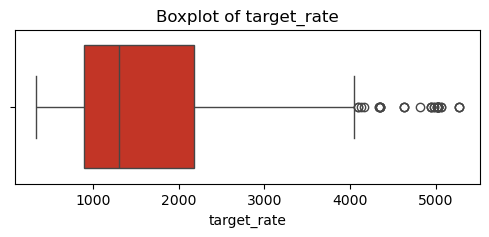

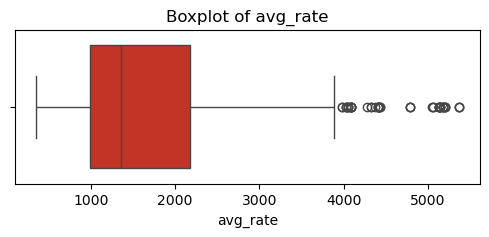

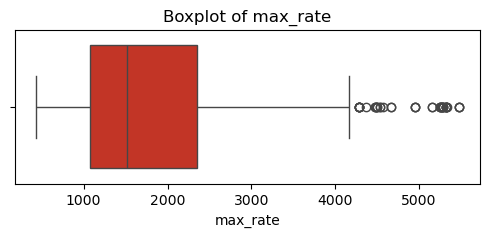

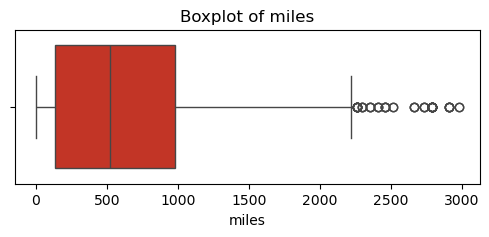

In [56]:
for i in num_col:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[i], color='#DC200C')
    plt.title(f'Boxplot of {i}')
    plt.show()

In [57]:
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] > upper_bound, upper_bound, np.where(df[column] < lower_bound, lower_bound, df[column]))
    return df

In [58]:
for i in num_col:
    df = outliers(df,i)

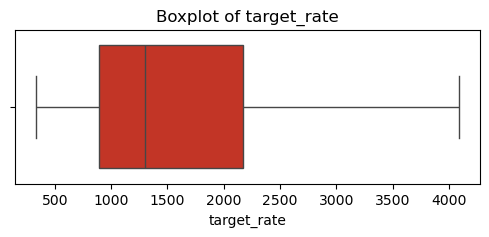

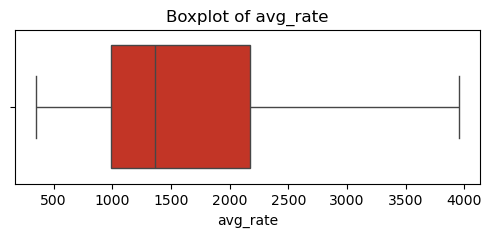

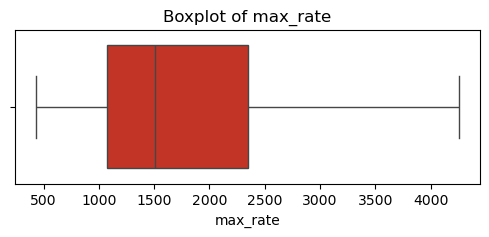

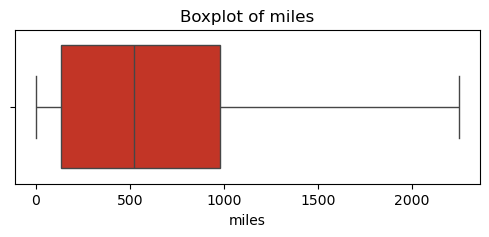

In [59]:
for i in num_col:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[i], color = '#DC200C')
    plt.title(f'Boxplot of {i}')
    plt.show()

In [60]:
df.head()

,origin_zip,destination_zip,equipment_type,origin_city,origin_state,destination_city,destination_state,rate_source,duration,target_rate,avg_rate,max_rate,miles,created_at,cache_date,updated_at
0,60803,51565,2,Alsip,IL,Portsmouth,IA,Rate source1,3.0,1067.06,1132.11,1194.78,477.47,52:43.4,30:00.0,52:43.4
1,19067,33801,2,Lower Makefield,PA,Lakeland,FL,Rate source1,3.0,2167.37,2248.16,2336.43,1050.49,54:01.9,30:00.0,54:01.9
2,78040,51249,2,Laredo,TX,Cloverdale,IA,Rate source1,3.0,2272.10,2335.98,2448.56,1168.47,54:02.3,30:00.0,54:02.3
3,19092,45133,2,Philadelphia,PA,Allensburg,OH,Rate source1,3.0,1009.22,1051.83,1116.16,549.35,54:02.8,30:00.0,54:02.8
4,44502,60140,2,Youngstown,OH,Campton Hills,IL,Rate source1,3.0,712.08,769.73,839.45,436.48,54:03.2,30:00.0,54:03.2


In [61]:
df.to_excel("project1_transformed_data.xlsx", index=False)

<h1 style="font-size:30px; background-color:#DC143C; color:white; padding:10px; font-family:'Helvetica';">
  Encoding
</h1>

In [63]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['origin_state'] = le.fit_transform(df['origin_state'])
df['destination_state'] = le.fit_transform(df['destination_state'])
df['origin_city'] = le.fit_transform(df['origin_city'])
df['destination_city'] = le.fit_transform(df['destination_city'])
df['rate_source'] = le.fit_transform(df['rate_source'])


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947 entries, 0 to 1946
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   origin_zip         1947 non-null   int64  
 1   destination_zip    1947 non-null   int64  
 2   equipment_type     1947 non-null   int64  
 3   origin_city        1947 non-null   int32  
 4   origin_state       1947 non-null   int32  
 5   destination_city   1947 non-null   int32  
 6   destination_state  1947 non-null   int32  
 7   rate_source        1947 non-null   int32  
 8   duration           1947 non-null   float64
 9   target_rate        1947 non-null   float64
 10  avg_rate           1947 non-null   float64
 11  max_rate           1947 non-null   float64
 12  miles              1947 non-null   float64
 13  created_at         1947 non-null   object 
 14  cache_date         1947 non-null   object 
 15  updated_at         1947 non-null   object 
dtypes: float64(5), int32(5),

In [65]:
df.head()

,origin_zip,destination_zip,equipment_type,origin_city,origin_state,destination_city,destination_state,rate_source,duration,target_rate,avg_rate,max_rate,miles,created_at,cache_date,updated_at
0,60803,51565,2,14,10,224,9,0,3.0,1067.06,1132.11,1194.78,477.47,52:43.4,30:00.0,52:43.4
1,19067,33801,2,150,29,166,7,0,3.0,2167.37,2248.16,2336.43,1050.49,54:01.9,30:00.0,54:01.9
2,78040,51249,2,142,32,81,9,0,3.0,2272.10,2335.98,2448.56,1168.47,54:02.3,30:00.0,54:02.3
3,19092,45133,2,178,29,4,29,0,3.0,1009.22,1051.83,1116.16,549.35,54:02.8,30:00.0,54:02.8
4,44502,60140,2,217,27,57,11,0,3.0,712.08,769.73,839.45,436.48,54:03.2,30:00.0,54:03.2


In [66]:
df = df.drop(['created_at', 'cache_date', 'updated_at'], axis=1)

<h1 style="font-size:30px; background-color:#DC143C; color:white; padding:10px; font-family:'Helvetica';">
  Skewness Handling
</h1>

In [68]:
df.skew().sort_values(ascending=False)

duration             13.662529
rate_source           3.541312
miles                 0.992225
target_rate           0.926867
avg_rate              0.877829
max_rate              0.834509
destination_city      0.337120
origin_city           0.321475
origin_state          0.247406
destination_state     0.138906
destination_zip      -0.019012
origin_zip           -0.146922
equipment_type       -1.868306
dtype: float64

In [69]:
df['duration'] = np.log1p(df['duration']) 
df['rate_source'] = np.log1p(df['rate_source'])
df['miles'] = np.log1p(df['miles'])
df['target_rate'] = np.log1p(df['target_rate'])
df['avg_rate'] = np.log1p(df['avg_rate'])
df['max_rate'] = np.log1p(df['max_rate'])

df['equipment_type'] = np.power(df['equipment_type'], 2)

In [70]:
df['duration'] = np.log1p(df['duration'])
df['rate_source'] = np.log1p(df['rate_source'])

df['miles'] = np.square(df['miles'])
df['equipment_type'] = np.square(df['equipment_type'])

In [71]:
df.skew().sort_values(ascending=False)

rate_source          3.541312
duration             1.593843
destination_city     0.337120
origin_city          0.321475
origin_state         0.247406
destination_state    0.138906
avg_rate            -0.015505
destination_zip     -0.019012
target_rate         -0.040395
max_rate            -0.046623
origin_zip          -0.146922
miles               -0.791407
equipment_type      -1.706538
dtype: float64

<h1 style="font-size:30px; background-color:#DC143C; color:white; padding:10px; font-family:'Helvetica';">
  Correlation
</h1>

In [73]:
num_cols = ['origin_zip', 'destination_zip', 'equipment_type', 
            'origin_city', 'origin_state', 'destination_city', 'destination_state',
            'rate_source', 'duration', 'target_rate', 'avg_rate', 'max_rate', 'miles']

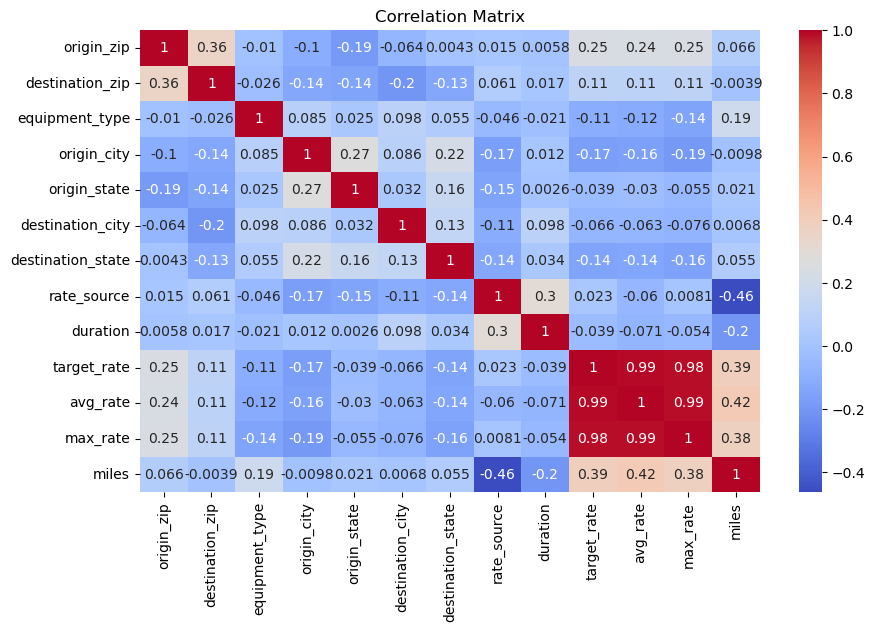

In [74]:
correlation_matrix = df[num_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [75]:
corr = correlation_matrix['target_rate'].sort_values(ascending=False)
print(corr)

target_rate          1.000000
avg_rate             0.991593
max_rate             0.984949
miles                0.390361
origin_zip           0.245635
destination_zip      0.113517
rate_source          0.022938
origin_state        -0.038744
duration            -0.038999
destination_city    -0.065890
equipment_type      -0.107699
destination_state   -0.143775
origin_city         -0.166246
Name: target_rate, dtype: float64


<h1 style="font-size:30px; background-color:#DC143C; color:white; padding:10px; font-family:'Helvetica';">
  Splitting Features(x) and Target(y)
</h1>

In [77]:
x = df.drop('target_rate', axis=1)
y = df['target_rate']

<h1 style="font-size:30px; background-color:#DC143C; color:white; padding:10px; font-family:'Helvetica';">
  Setting Up Standard Scaling
</h1>

In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [80]:
x_sc = sc.fit_transform(x)

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<h1 style="font-size:30px; background-color:#DC143C; color:white; padding:10px; font-family:'Helvetica';">
  Train-Test Split
</h1>

In [83]:
xtrain,xtest,ytrain,ytest = train_test_split(x_sc,y,test_size=0.2,random_state=1)

In [84]:
def my_model(model):
    global Training_score, Testing_score, R2_Score, MAE, MSE, RMSE
    model.fit(xtrain, ytrain)
    yp = model.predict(xtest)

    Training_score = model.score(xtrain, ytrain)
    Testing_score = model.score(xtest, ytest)
    
    R2_Score = r2_score(ytest, yp)
    MAE = mean_absolute_error(ytest, yp)
    MSE = mean_squared_error(ytest, yp)
    RMSE = np.sqrt(MSE)
    return model

<h1 style="font-size:40px; background-color:#FFFFFF; color:red; padding:10px; font-family:'Helvetica'; text-align:center;font-weight:bold;">
  Base Model Creation
</h1>

In [86]:
d1 = {"Model":[],"Training Score":[],"Testing Score":[],"R2 Score":[],"MAE":[],"MSE":[],"RMSE":[],}
result1 = pd.DataFrame(d1)
result1

,Model,Training Score,Testing Score,R2 Score,MAE,MSE,RMSE


<h1 style="font-size:30px; background-color:#FFFFFF; color:red; padding:10px; font-family:'Helvetica';font-weight:bold;">
  Linear Regression - Base Model
</h1>

In [88]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
my_model(lr)

LinearRegression()

In [89]:
re = pd.DataFrame([["Linear Regression",Training_score,Testing_score,R2_Score, MAE,MSE,RMSE]],columns=result1.columns)

In [90]:
result1 = pd.concat([result1, re], ignore_index=True)
result1

,Model,Training Score,Testing Score,R2 Score,MAE,MSE,RMSE
0,Linear Regression,0.990071,0.992349,0.992349,0.030706,0.002558,0.050581


<h1 style="font-size:30px; background-color:#FFFFFF; color:red; padding:10px; font-family:'Helvetica';font-weight:bold;">
  Decision Tree - Base Model
</h1>

In [92]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [93]:
my_model(dt)

DecisionTreeRegressor()

In [94]:
re = pd.DataFrame([["Decision Tree",Training_score,Testing_score,R2_Score, MAE,MSE,RMSE]],columns=result1.columns)

In [95]:
result1 = pd.concat([result1, re], ignore_index=True)
result1

,Model,Training Score,Testing Score,R2 Score,MAE,MSE,RMSE
0,Linear Regression,0.990071,0.992349,0.992349,0.030706,0.002558,0.050581
1,Decision Tree,1.000000,0.988542,0.988542,0.010003,0.003831,0.061899


<h1 style="font-size:30px; background-color:#FFFFFF; color:red; padding:10px; font-family:'Helvetica';font-weight:bold;">
  K-Nearest Neighbors - Base Model
</h1>

In [97]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()

In [98]:
my_model(KNN)

KNeighborsRegressor()

In [99]:
re = pd.DataFrame([["K-Nearest Neighbors",Training_score,Testing_score,R2_Score, MAE,MSE,RMSE]],columns=result1.columns)

In [100]:
result1 = pd.concat([result1, re], ignore_index=True)
result1

,Model,Training Score,Testing Score,R2 Score,MAE,MSE,RMSE
0,Linear Regression,0.990071,0.992349,0.992349,0.030706,0.002558,0.050581
1,Decision Tree,1.000000,0.988542,0.988542,0.010003,0.003831,0.061899
2,K-Nearest Neighbors,0.967872,0.946570,0.946570,0.087823,0.017866,0.133664


<h1 style="font-size:30px; background-color:#FFFFFF; color:red; padding:10px; font-family:'Helvetica';font-weight:bold;">
  Support Vector Machine - Base Model
</h1>

In [102]:
from sklearn.svm import SVR
SVM = SVR()

In [103]:
my_model(SVM)

SVR()

In [104]:
re = pd.DataFrame([["Support Vector Machine",Training_score,Testing_score,R2_Score, MAE,MSE,RMSE]],columns=result1.columns)

In [105]:
result1 = pd.concat([result1, re], ignore_index=True)
result1

,Model,Training Score,Testing Score,R2 Score,MAE,MSE,RMSE
0,Linear Regression,0.990071,0.992349,0.992349,0.030706,0.002558,0.050581
1,Decision Tree,1.000000,0.988542,0.988542,0.010003,0.003831,0.061899
2,K-Nearest Neighbors,0.967872,0.946570,0.946570,0.087823,0.017866,0.133664
3,Support Vector Machine,0.986449,0.981850,0.981850,0.060923,0.006069,0.077905


<h1 style="font-size:30px; background-color:#FFFFFF; color:red; padding:10px; font-family:'Helvetica';font-weight:bold;">
  Random Forest - Base Model
</h1>

In [107]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()

In [108]:
my_model(RFR)

RandomForestRegressor()

In [109]:
re = pd.DataFrame([["Random Forest",Training_score,Testing_score,R2_Score, MAE,MSE,RMSE]],columns=result1.columns)

In [110]:
result1 = pd.concat([result1, re], ignore_index=True)
result1

,Model,Training Score,Testing Score,R2 Score,MAE,MSE,RMSE
0,Linear Regression,0.990071,0.992349,0.992349,0.030706,0.002558,0.050581
1,Decision Tree,1.000000,0.988542,0.988542,0.010003,0.003831,0.061899
2,K-Nearest Neighbors,0.967872,0.946570,0.946570,0.087823,0.017866,0.133664
3,Support Vector Machine,0.986449,0.981850,0.981850,0.060923,0.006069,0.077905
4,Random Forest,0.999107,0.993828,0.993828,0.011686,0.002064,0.045429


<h1 style="font-size:30px; background-color:#FFFFFF; color:red; padding:10px; font-family:'Helvetica';font-weight:bold;">
  XGBoost - Base Model
</h1>

In [112]:
from xgboost import XGBRegressor
XGB = XGBRegressor()

In [113]:
my_model(XGB)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [114]:
re = pd.DataFrame([["XGBoost",Training_score,Testing_score,R2_Score, MAE,MSE,RMSE]],columns=result1.columns)

In [115]:
result1 = pd.concat([result1, re], ignore_index=True)
result1

,Model,Training Score,Testing Score,R2 Score,MAE,MSE,RMSE
0,Linear Regression,0.990071,0.992349,0.992349,0.030706,0.002558,0.050581
1,Decision Tree,1.000000,0.988542,0.988542,0.010003,0.003831,0.061899
2,K-Nearest Neighbors,0.967872,0.946570,0.946570,0.087823,0.017866,0.133664
3,Support Vector Machine,0.986449,0.981850,0.981850,0.060923,0.006069,0.077905
4,Random Forest,0.999107,0.993828,0.993828,0.011686,0.002064,0.045429
5,XGBoost,0.999972,0.990133,0.990133,0.010471,0.003299,0.057441


In [117]:
def highlight_xgboost(row):
    return ['background-color: #DC143C' if row['Model'] == 'Random Forest' else '' for _ in row]

result1.style.apply(highlight_xgboost, axis=1)

,Model,Training Score,Testing Score,R2 Score,MAE,MSE,RMSE
0,Linear Regression,0.990071,0.992349,0.992349,0.030706,0.002558,0.050581
1,Decision Tree,1.000000,0.988542,0.988542,0.010003,0.003831,0.061899
2,K-Nearest Neighbors,0.967872,0.946570,0.946570,0.087823,0.017866,0.133664
3,Support Vector Machine,0.986449,0.981850,0.981850,0.060923,0.006069,0.077905
4,Random Forest,0.999107,0.993828,0.993828,0.011686,0.002064,0.045429
5,XGBoost,0.999972,0.990133,0.990133,0.010471,0.003299,0.057441


<div style="text-align:left; color:#DC143C; font-family:'Helvetica'; font-size:30px;text-align:center;font-weight:bold;">
  <b>
    ⚡Best Base Model: Random Forest
  </b>
</div>

<h1 style="font-size:40px; background-color:#FFFFFF; color:red; padding:10px; font-family:'Helvetica'; text-align:center;font-weight:bold;">
  Final Model Creation
</h1>

In [121]:
d2 = {"Model":[],"Training Score":[],"Testing Score":[],"R2 Score":[],"MAE":[],"MSE":[],"RMSE":[],}
result2 = pd.DataFrame(d2)
result2

,Model,Training Score,Testing Score,R2 Score,MAE,MSE,RMSE


In [123]:
from sklearn.model_selection import GridSearchCV

<h1 style="font-size:30px; background-color:#FFFFFF; color:red; padding:10px; font-family:'Helvetica';font-weight:bold;">
  Tuned Linear Regression Model
</h1>

In [126]:
param_grid = {'fit_intercept': [True, False],'positive': [True, False]}

In [128]:
grid_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='r2')
grid_lr.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='r2')

In [130]:
grid_lr.best_estimator_

LinearRegression(positive=True)

In [132]:
my_model(LinearRegression(positive=True))

LinearRegression(positive=True)

In [134]:
re2 = pd.DataFrame([["Linear Regression",Training_score,Testing_score,R2_Score, MAE,MSE,RMSE]],columns=result2.columns)

In [136]:
result2 = pd.concat([result2, re2], ignore_index=True)
result2

,Model,Training Score,Testing Score,R2 Score,MAE,MSE,RMSE
0,Linear Regression,0.990069,0.992327,0.992327,0.030883,0.002566,0.050654


<h1 style="font-size:30px; background-color:#FFFFFF; color:red; padding:10px; font-family:'Helvetica';font-weight:bold;">
  Tuned Decision Tree Model
</h1>

In [139]:
param_grid = {'max_depth': [None, 5, 10, 20],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}

In [141]:
grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='r2')
grid_dt.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [143]:
grid_dt.best_estimator_

DecisionTreeRegressor(max_depth=20)

In [145]:
my_model(DecisionTreeRegressor(max_depth=20, min_samples_split=5))

DecisionTreeRegressor(max_depth=20, min_samples_split=5)

In [147]:
re2 = pd.DataFrame([["Decision Tree",Training_score,Testing_score,R2_Score, MAE,MSE,RMSE]],columns=result2.columns)

In [149]:
result2 = pd.concat([result2, re2], ignore_index=True)
result2

,Model,Training Score,Testing Score,R2 Score,MAE,MSE,RMSE
0,Linear Regression,0.990069,0.992327,0.992327,0.030883,0.002566,0.050654
1,Decision Tree,0.999899,0.988579,0.988579,0.011527,0.003819,0.061798


<h1 style="font-size:30px; background-color:#FFFFFF; color:red; padding:10px; font-family:'Helvetica';font-weight:bold;">
  Tuned K-Nearest Neighbors Model
</h1>

In [152]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]}

In [154]:
grid_knn = GridSearchCV(estimator=KNN, param_grid=param_grid, cv=5, scoring='r2')
grid_knn.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [155]:
grid_knn.best_estimator_

KNeighborsRegressor(n_neighbors=9, p=1, weights='distance')

In [156]:
my_model(KNeighborsRegressor(n_neighbors=11, p=1, weights='distance'))

KNeighborsRegressor(n_neighbors=11, p=1, weights='distance')

In [157]:
re2 = pd.DataFrame([["K-Nearest Neighbors",Training_score,Testing_score,R2_Score, MAE,MSE,RMSE]],columns=result2.columns)

In [160]:
result2 = pd.concat([result2, re2], ignore_index=True)
result2

,Model,Training Score,Testing Score,R2 Score,MAE,MSE,RMSE
0,Linear Regression,0.990069,0.992327,0.992327,0.030883,0.002566,0.050654
1,Decision Tree,0.999899,0.988579,0.988579,0.011527,0.003819,0.061798
2,K-Nearest Neighbors,1.000000,0.989805,0.989805,0.011488,0.003409,0.058388


<h1 style="font-size:30px; background-color:#FFFFFF; color:red; padding:10px; font-family:'Helvetica';font-weight:bold;">
  Tuned Random Forest Model
</h1>

In [165]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [167]:
grid_rf = GridSearchCV(estimator=RFR, param_grid=param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [168]:
grid_rf.best_estimator_

RandomForestRegressor(min_samples_leaf=2)

In [169]:
my_model(RandomForestRegressor(max_depth=10, min_samples_split=5))

RandomForestRegressor(max_depth=10, min_samples_split=5)

In [170]:
re2 = pd.DataFrame([["Random Forest",Training_score,Testing_score,R2_Score, MAE,MSE,RMSE]],columns=result2.columns)

In [171]:
result2 = pd.concat([result2, re2], ignore_index=True)
result2

,Model,Training Score,Testing Score,R2 Score,MAE,MSE,RMSE
0,Linear Regression,0.990069,0.992327,0.992327,0.030883,0.002566,0.050654
1,Decision Tree,0.999899,0.988579,0.988579,0.011527,0.003819,0.061798
2,K-Nearest Neighbors,1.000000,0.989805,0.989805,0.011488,0.003409,0.058388
3,Random Forest,0.998800,0.993062,0.993062,0.013955,0.002320,0.048166


<h1 style="font-size:30px; background-color:#FFFFFF; color:red; padding:10px; font-family:'Helvetica';font-weight:bold;">
  Tuned XGBoost Model
</h1>

In [173]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

In [174]:
grid_xgb = GridSearchCV(estimator=XGB, param_grid=param_grid_xgb, cv=5, scoring='r2', n_jobs=-1)
grid_xgb.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat...
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1]},
             scoring='r2')

In [175]:
grid_xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [176]:
my_model = XGBRegressor(
    base_score=0.5, booster='gbtree',
    colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
    enable_categorical=False,
    gamma=0, gpu_id=-1, grow_policy='depthwise',
    learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
    max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
    missing=np.nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
    num_parallel_tree=1, predictor='auto', random_state=0,
    reg_alpha=0, reg_lambda=1
)

In [177]:
re2 = pd.DataFrame([["XGBoost",Training_score,Testing_score,R2_Score, MAE,MSE,RMSE]],columns=result2.columns)

In [178]:
result2 = pd.concat([result2, re2], ignore_index=True)
result2

,Model,Training Score,Testing Score,R2 Score,MAE,MSE,RMSE
0,Linear Regression,0.990069,0.992327,0.992327,0.030883,0.002566,0.050654
1,Decision Tree,0.999899,0.988579,0.988579,0.011527,0.003819,0.061798
2,K-Nearest Neighbors,1.000000,0.989805,0.989805,0.011488,0.003409,0.058388
3,Random Forest,0.998800,0.993062,0.993062,0.013955,0.002320,0.048166
4,XGBoost,0.998800,0.993062,0.993062,0.013955,0.002320,0.048166


In [179]:
def highlight_xgboost(row):
    return ['background-color: #DC143C' if row['Model'] == 'XGBoost' else '' for _ in row]

result2.style.apply(highlight_xgboost, axis=1)

,Model,Training Score,Testing Score,R2 Score,MAE,MSE,RMSE
0,Linear Regression,0.990069,0.992327,0.992327,0.030883,0.002566,0.050654
1,Decision Tree,0.999899,0.988579,0.988579,0.011527,0.003819,0.061798
2,K-Nearest Neighbors,1.000000,0.989805,0.989805,0.011488,0.003409,0.058388
3,Random Forest,0.998800,0.993062,0.993062,0.013955,0.002320,0.048166
4,XGBoost,0.998800,0.993062,0.993062,0.013955,0.002320,0.048166


<div style="text-align:left; color:#DC143C; font-family:'Helvetica'; font-size:30px;text-align:center;font-weight:bold;">
  <b>
    ⚡Best Final Model: XGBoost
  </b>
</div>